## Author : Vaishnav Krishna P
### Dataset : public dataset from the researchers from University of Picardie Jules Verne

In [21]:
# importing the necessory depedency
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import make_scorer, accuracy_score

In [3]:
# Loading the datset
df = pd.read_csv('/content/Metadata_Participants.csv')

In [4]:
# first 5 records
df.head()

,ParticipantID,Gender,Date of Presentation,Age,Class,CARS Score
0,1,M,27/04/2015,7.0,TS,32.5
1,2,F,28/04/2015,8.9,TS,36.5
2,3,M,28/04/2015,4.4,TS,27.0
3,4,M,29/04/2015,6.9,TS,35.0
4,5,M,06/05/2015,8.9,TS,31.0


In [5]:
# participant id, date of presentation is not reqquired
df.drop(columns=['ParticipantID', 'Date of Presentation'], inplace=True)

In [6]:
df.head()

,Gender,Age,Class,CARS Score
0,M,7.0,TS,32.5
1,F,8.9,TS,36.5
2,M,4.4,TS,27.0
3,M,6.9,TS,35.0
4,M,8.9,TS,31.0


In [13]:
# checking for the missing values
df.isna().sum()

,0
Gender,0
Age,0
Class,0
CARS Score,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      59 non-null     object 
 1   Age         59 non-null     float64
 2   Class       59 non-null     object 
 3   CARS Score  29 non-null     float64
dtypes: float64(2), object(2)
memory usage: 2.0+ KB


In [12]:
# Dealing the missing value
df = df.fillna(df['CARS Score'].mean())

In [18]:
# Data transformation techniques
df["Gender"] = df['Gender'].map({'M':0, "F":1})
df['Class'] = df['Class'].map({"TS":0, "TC":1})

In [19]:
# splitting the target features
X = df.drop(columns=['Class'])
y = df['Class']

In [20]:
X.shape,y.shape

((59, 3), (59,))

In [22]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis()
}

In [23]:
# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = {}

# Train and evaluate each model
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=cv, scoring=make_scorer(accuracy_score))
    results[name] = scores.mean()
    print(f"{name}: {scores.mean():.4f}")

Logistic Regression: 0.6636
KNN: 0.8121
Decision Tree: 0.9652
Random Forest: 0.9136
SVM: 0.5091
Naive Bayes: 1.0000
Gradient Boosting: 0.9652
AdaBoost: 0.9652
LDA: 0.7136
QDA: 0.5091


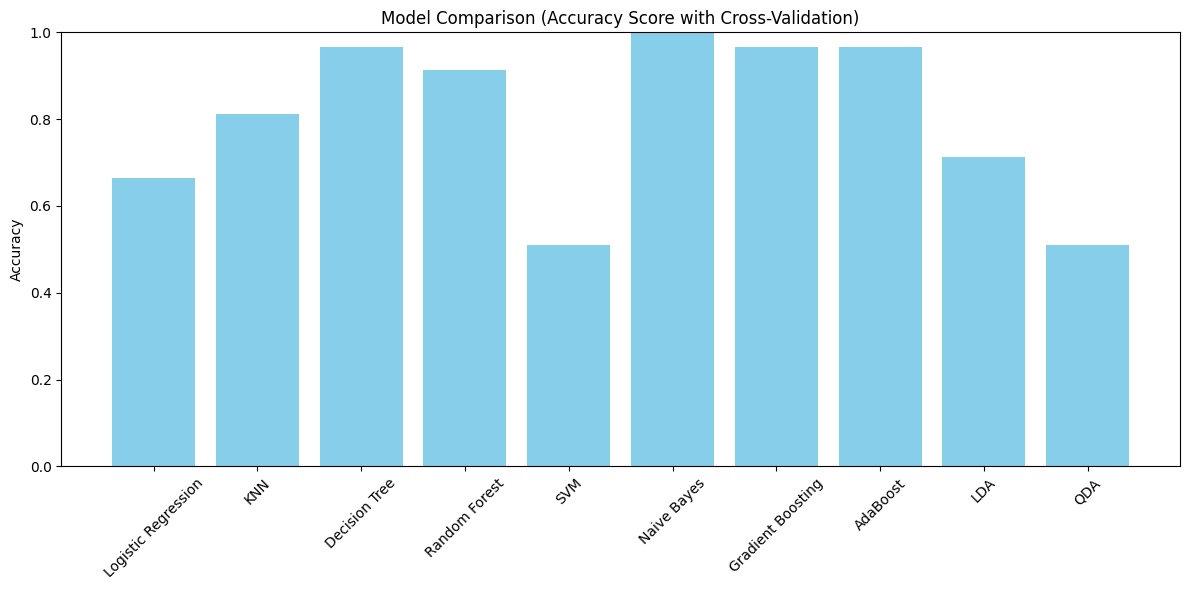

In [24]:
# Visualization
plt.figure(figsize=(12, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel("Accuracy")
plt.title("Model Comparison (Accuracy Score with Cross-Validation)")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()